# Data Visualization Assignment – Data Analysis Course
**Welcome** to the Data Visualization assignment. Your task is to explore a dataset of your choice and create meaningful visual representations of the data. Use Python or any other data analysis tool (e.g., Flourish) to generate at least six visualizations, incorporating at least four different types, to effectively communicate insights and trends.

**Exploration and Tools**   
Explore the following links to experiment with various visualization tools and explore different types of visualizations:

[RAWGraphs](https://www.rawgraphs.io/)  
[Flourish](https://flourish.studio/)  
[Data Visualization Catalogue](https://datavizcatalogue.com/)

You can create visualizations using Python (ex. Matplotlib) or any other data analysis tool of your choice (e.g., Flourish or other preferred platforms).


**Task Description**  
Find a dataset from [Kaggle](https://www.kaggle.com/) or another source and create at least **six** different visualizations.


*   Use a minimum of four different visualization types (refer to Data Visualization Catalogue for options).

*   The visualizations should be coherent and build a story about the data.

**Figure Descriptions**   
For each figure, provide a short descriptive text, similar to what you would include in a scientific paper.

**Submission Instructions**   
Your solution should be uploaded to Git, using the same GitHub project as your last assignment.
Add your solution (code + data) to the project.
If the dataset is too large, provide a link to the data in your notebook instead.
Commit and push your work to your branch, ensuring it is visible.

Put your visualisations down below (if you choose python).

In [66]:
!pip install --upgrade kagglehub[pandas-datasets,hf-datasets]

# Importing important libraries

In [62]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt

# Loading the **Student Performance** data

In [82]:
dataset = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "spscientist/students-performance-in-exams",
    "StudentsPerformance.csv",
)

<ipython-input-82-1e58b104d1ef>:1: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataset = kagglehub.load_dataset(


100%|██████████| 70.3k/70.3k [00:00<00:00, 800kB/s]


# Viewing the type of datas stored in our dataset

In [83]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Making the plots

<Axes: xlabel='reading score', ylabel='writing score'>

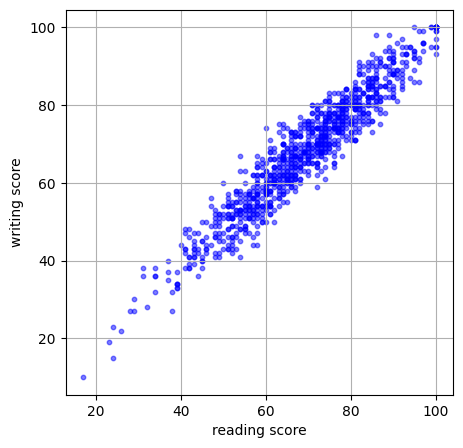

In [228]:
dataset.plot("reading score", "writing score", kind = "scatter", s = 10.0, figsize = (5, 5), c = 'blue', grid = True, alpha = 0.5)

We can see that writing and reading scores collerate as one would expect. Students who got a higher scores in reading also tend to score higher in writing.

<Axes: xlabel='math score', ylabel='Scores'>

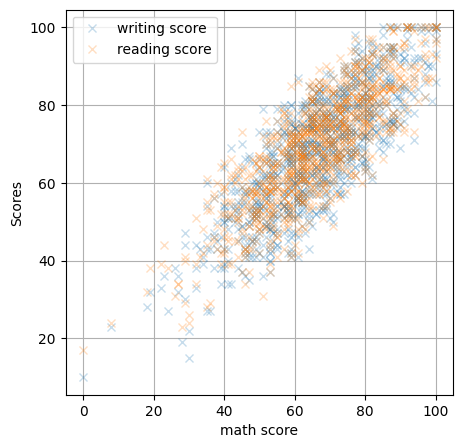

In [227]:
dataset.plot("math score", ["writing score", "reading score"], figsize = (5, 5), linestyle = "none", marker = 'x', alpha = 0.25, xlabel = 'math score', ylabel = "Scores", grid = True)

What is more interesting is that even the math scores correlate with the writing and reading scores, which means that "good" students get better grades at every material, while "bad" students do the opposite.

Text(0.5, 1.0, 'Distribution of math scores')

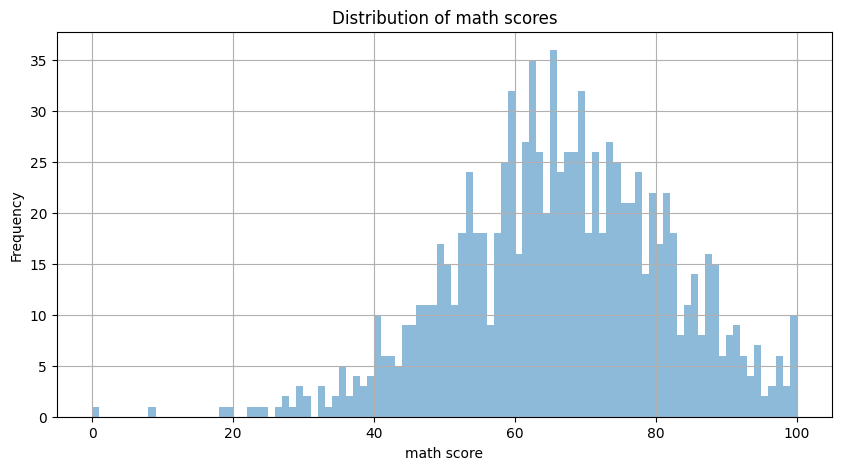

In [207]:
dataset.hist(column = "math score", bins = 100, figsize = (10, 5), alpha = 0.5)
ax = plt.gca()
ax.set_xlabel("math score")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of math scores")

The math scores distribution generates what seems to be a normal distribution, this can be proved by fitting a Gaussean function to the data.

Text(0.5, 1.0, 'Average Score by Material')

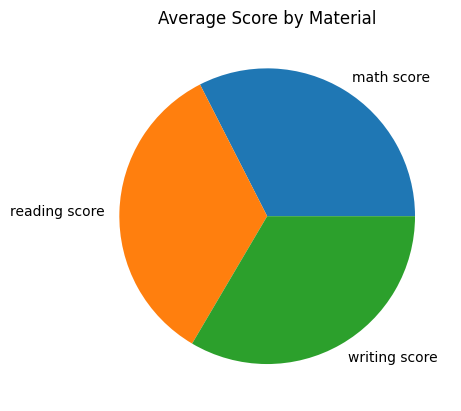

In [202]:
dataset.mean(numeric_only=True).plot.pie()
ax = plt.gca()
ax.set_title("Average Score by Material")

From this pie chart we see that all three materials have roughly the same average as they all take up 1/3 of the circle, this means that none of the materials is favored by the students or the teachers.

In [168]:
grouped = dataset.groupby("race/ethnicity")
mean = grouped.mean("math score", "reading score", "writing score")

Text(0.5, 1.0, 'Mean Scores by Race/Ethnicity')

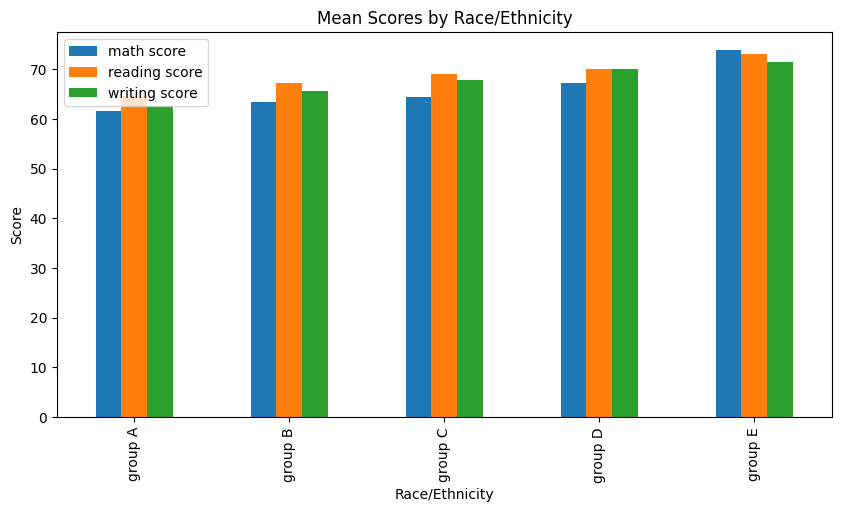

In [171]:
mean.plot(kind = "bar", figsize = (10, 5))
ax = plt.gca()
ax.set_xlabel("Race/Ethnicity")
ax.set_ylabel("Score")
ax.set_title("Mean Scores by Race/Ethnicity")

Group E had the highest average out of all three materials, while group A scored the lowest.

In [179]:
grouped2 = dataset.groupby("parental level of education")
mean2 = grouped2.mean("math score", "reading score", "writing score")

Text(0.5, 1.0, 'Mean Scores by Parental Level of Education')

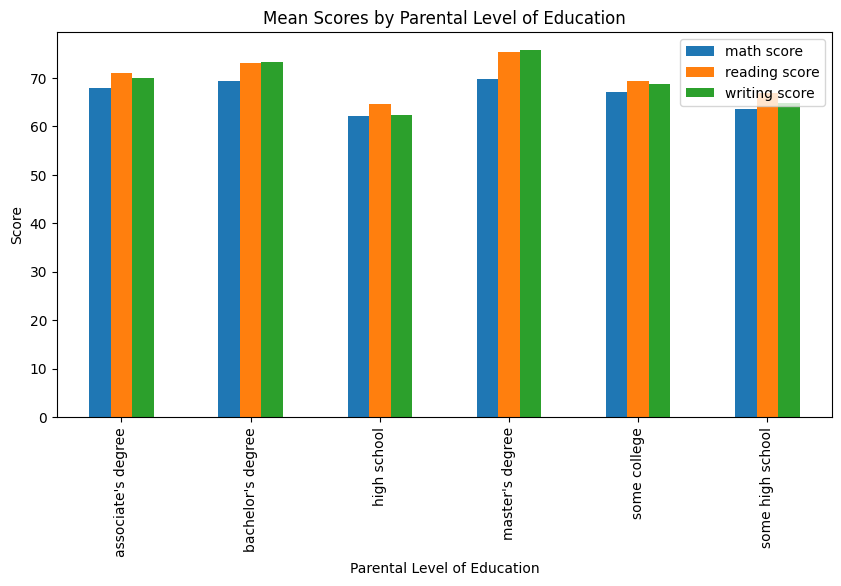

In [182]:
mean2.plot(kind = "bar", figsize = (10, 5))
ax = plt.gca()
ax.set_xlabel("Parental Level of Education")
ax.set_ylabel("Score")
ax.set_title("Mean Scores by Parental Level of Education")


Students whose parents have master's degree scored on average higher that the students whose parents have a high school diploma.